<a href="https://colab.research.google.com/github/pmargarete/CCDATSCL_ASSIGNMENTS/blob/main/DS_Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [1]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [2]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [5]:
cols = df.columns

Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [7]:
shape_info = df.shape

## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [9]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Drop rows where duration is missing. Save to df_clean.

In [10]:
df_clean = df.dropna(subset=['duration'])

In [26]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [42]:
import numpy as np

def extract_minutes(duration_str):
    if isinstance(duration_str, str):
        if 'min' in duration_str:
            return int(duration_str.replace(' min', ''))
        elif 'Season' in duration_str:
            # For TV shows assuming 1 season = 45mins * 6 episode
            try:
                num_seasons = int(duration_str.split(' ')[0])
                return num_seasons * 270 # Assuming 270 minutes per season
            except ValueError:
                return np.nan
    return np.nan

df_clean['duration_minutes'] = df_clean['duration'].apply(extract_minutes)

/tmp/ipython-input-199535106.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_minutes'] = df_clean['duration'].apply(extract_minutes)


In [43]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",540
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,270
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",270
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,540


In [44]:
df_num = df_clean.select_dtypes(include=['number'])

In [47]:
df_num

,release_year,duration_minutes
0,2020,90
1,2021,540
2,2021,270
3,2021,270
4,2021,540
...,...,...
8802,2007,158
8803,2018,540
8804,2009,88
8805,2006,88


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [48]:
dur = df_clean['duration_minutes']

Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_minmax = MinMaxScaler()
dur_minmax = scaler_minmax.fit_transform(dur.values.reshape(-1, 1))

In [53]:
dur_minmax

array([[0.01896664],
       [0.11706998],
       [0.05820798],
       ...,
       [0.01853063],
       [0.01853063],
       [0.0235448 ]])

Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [59]:
scaler_zscore = StandardScaler()
dur_zscore = scaler_zscore.fit_transform(dur.values.reshape(-1, 1))

In [60]:
dur_zscore

array([[-0.4230995 ],
       [ 1.11042759],
       [ 0.19031134],
       ...,
       [-0.42991517],
       [-0.42991517],
       [-0.3515349 ]])

## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [97]:
bins = [1, 1148, 2296, 3444, 4592] #min: 3 & max:4590
dur_width_bins = pd.cut(dur, bins)
df_clean['duration_equal_width_bin'] = dur_width_bins

/tmp/ipython-input-3874588591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_equal_width_bin'] = dur_width_bins


Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [109]:
print("Bin Edges (Equal-Width):")
print(pd.cut(df_clean['duration_minutes'], bins=4, include_lowest=True).head())
print("\nNumber of movies in each bin (Equal-Width):")
counts_sorted = df_clean['duration_equal_width_bin'].value_counts().sort_index()
print(counts_sorted)

Bin Edges (Equal-Width):
0    (-1.5879999999999999, 1149.75]
1    (-1.5879999999999999, 1149.75]
2    (-1.5879999999999999, 1149.75]
3    (-1.5879999999999999, 1149.75]
4    (-1.5879999999999999, 1149.75]
Name: duration_minutes, dtype: category
Categories (4, interval[float64, right]): [(-1.5879999999999999, 1149.75] < (1149.75, 2296.5] < (2296.5, 3443.25] <
                                           (3443.25, 4590.0]]

Number of movies in each bin (Equal-Width):
duration_equal_width_bin
(1, 1148]       8640
(1148, 2296]     138
(2296, 3444]      20
(3444, 4592]       6
Name: count, dtype: int64


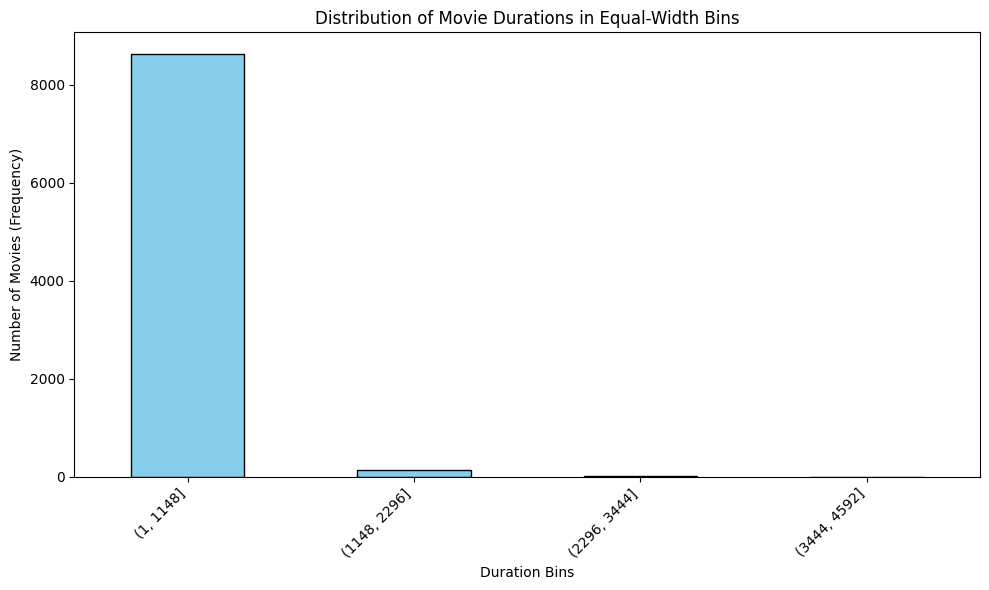

In [110]:

import matplotlib.pyplot as plt
# 3. Create and display the bar chart (histogram visualization of counts)
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size
counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations in Equal-Width Bins')
plt.xlabel('Duration Bins')
plt.ylabel('Number of Movies (Frequency)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [103]:
duration_equal_freq_bin = pd.qcut(dur, 4)
pd.value_counts(duration_equal_freq_bin)

/tmp/ipython-input-2948486065.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(duration_equal_freq_bin)


,count
duration_minutes,
"(112.0, 270.0]",3444
"(2.999, 92.0]",2263
"(92.0, 112.0]",2212
"(270.0, 4590.0]",885


In [105]:
#dur_quantile_bins = pd.qcut(dur, q=4, precision=2)
#df_clean['duration_equal_freq_bin'] = dur_quantile_bins

/tmp/ipython-input-1831740364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_equal_freq_bin'] = dur_quantile_bins


Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

In [106]:
print("Bin Edges (Equal-Frequency):")
# pd.qcut without labels=False will return the bins as categories
print(pd.qcut(df_clean['duration_minutes'], q=4).head())
print("\nNumber of movies in each bin (Equal-Frequency):")
print(df_clean['duration_equal_freq_bin'].value_counts().sort_index())

Bin Edges (Equal-Frequency):
0      (2.999, 92.0]
1    (270.0, 4590.0]
2     (112.0, 270.0]
3     (112.0, 270.0]
4    (270.0, 4590.0]
Name: duration_minutes, dtype: category
Categories (4, interval[float64, right]): [(2.999, 92.0] < (92.0, 112.0] < (112.0, 270.0] <
                                           (270.0, 4590.0]]

Number of movies in each bin (Equal-Frequency):
duration_equal_freq_bin
(2.99, 92.0]       2263
(92.0, 112.0]      2212
(112.0, 270.0]     3444
(270.0, 4590.0]     885
Name: count, dtype: int64


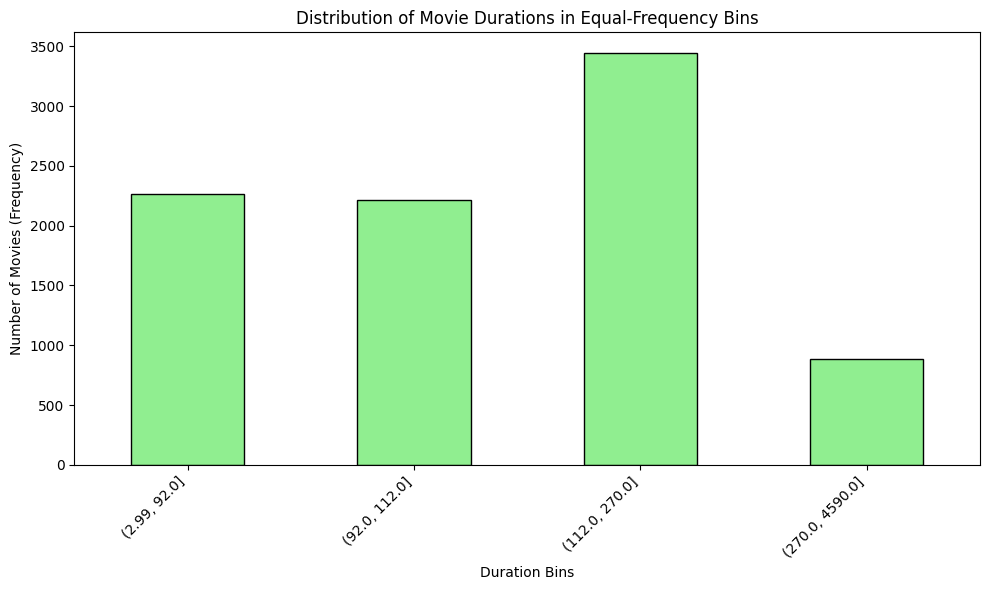

In [113]:
import matplotlib.pyplot as plt

counts_equal_freq = df_clean['duration_equal_freq_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
counts_equal_freq.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Durations in Equal-Frequency Bins')
plt.xlabel('Duration Bins')
plt.ylabel('Number of Movies (Frequency)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [114]:
from sklearn.preprocessing import LabelEncoder

df_knn = df_clean[['release_year', 'duration_minutes', 'type']].copy()

# drop rows
df_knn.dropna(inplace=True)
df_knn.reset_index(drop=True, inplace=True)

X = df_knn[['release_year', 'duration_minutes']]
y = df_knn['type']

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)
y = pd.Series(y_encoded, name='type_encoded')

print("First 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of encoded y:")
print(y.head())
print("\nUnique encoded labels:", y.unique())
print("Corresponding original labels:", label_encoder.inverse_transform(y.unique()))

First 5 rows of X:
   release_year  duration_minutes
0          2020                90
1          2021               540
2          2021               270
3          2021               270
4          2021               540

First 5 rows of encoded y:
0    0
1    1
2    1
3    1
4    1
Name: type_encoded, dtype: int64

Unique encoded labels: [0 1]
Corresponding original labels: ['Movie' 'TV Show']


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6162, 2)
Shape of X_test: (2642, 2)
Shape of y_train: (6162,)
Shape of y_test: (2642,)


In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_raw = KNeighborsClassifier(n_neighbors=5)

# training
knn_raw.fit(X_train, y_train)

# predictions on unscaled test data
y_pred_raw = knn_raw.predict(X_test)

# accuracy
acc_raw = accuracy_score(y_test, y_pred_raw)

print(f"Accuracy of KNN on unscaled data (acc_raw): {acc_raw:.4f}")

Accuracy of KNN on unscaled data (acc_raw): 1.0000


Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)

knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)

acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy of KNN on scaled data (acc_scaled): {acc_scaled:.4f}")

Accuracy of KNN on scaled data (acc_scaled): 0.9985


Did scaling improve accuracy? Explain why.

In [118]:
print(f"Accuracy on unscaled data (acc_raw): {acc_raw:.4f}")
print(f"Accuracy on scaled data (acc_scaled): {acc_scaled:.4f}")

Accuracy on unscaled data (acc_raw): 1.0000
Accuracy on scaled data (acc_scaled): 0.9985


It did not detrimentally affect much because only some missing values were removed from column 'duration' and converted to numerical values.
